(4179, 8500, 4)


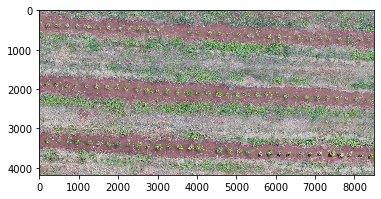

In [1]:
#%pylab inline
from PIL import Image
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import match_template

ImagenTotal = np.asarray(Image.open('MosaicoPouco.png'))
print(ImagenTotal.shape)
plt.imshow(ImagenTotal)
#plt.imshow(ImagenTotal)




In [ ]:
%matplotlib qt

ImagenR=ImagenTotal[:,:,0]
ImagenG=ImagenTotal[:,:,1]
ImagenB=ImagenTotal[:,:,2]

rf1 = np.where(ImagenG>125)
rf2 = np.where(ImagenB<95) #mENOR QUE 100
rf3 = np.where(ImagenR>250)

Imagen2=np.copy(ImagenR)

Imagen2[:,:]=0

Imagen2[rf1]=100

Imagen2[rf2]=250



Imagen2[rf3]=0

# Python program explaining 
# numpy.intersect1d() function 
     
# importing numpy as geek  

#gfg = np.intersect1d(rf1, rf2) 
#print(rf1.shape)

#Imagen2[gfg]=200
plt.imshow(Imagen2)

plt.colorbar()

In [79]:
ImagenTotal2 = rescale(ImagenTotal, 0.5, anti_aliasing=False)
#here you choose in between small, medium, large or extra
ImagenTemplate = np.asarray(Image.open('Ponto.png'))
print(ImagenTemplate.shape)
ImagenTemplate2 = rescale(ImagenTemplate, 0.5, anti_aliasing=False)
print(ImagenTemplate2.shape)


(35, 35, 4)
(18, 18, 2)


In [83]:
#notice that we work with one band
imagen = ImagenTotal2[:,:,0]
arbol = ImagenTemplate2[:,:,0]
#print(arbol)
plt.imshow(arbol)
print(imagen.shape)

(2090, 4250)


In [81]:

%matplotlib qt

result = match_template(imagen, arbol)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]
fig=plt.figure()

resultado=np.copy(result)
indexquente = np.where(resultado<0.4)
resultado[indexquente]=0
plt.imshow(resultado)
plt.colorbar()

In [82]:
%matplotlib qt
fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, adjustable='box')
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2, adjustable='box')

ax1.imshow(arbol, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(imagen, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('imagen')
# highlight matched region
harbol, warbol = arbol.shape
rect = plt.Rectangle((x, y), warbol, harbol, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=20)

plt.show()
print(result)

[[ 0.15089031  0.11116055 -0.02259422 ...  0.12020032  0.12633277
   0.08154568]
 [ 0.14614611  0.1363521   0.03812494 ...  0.12019895  0.14208922
   0.11567291]
 [ 0.13965109  0.16684729  0.11177106 ...  0.06938615  0.12020177
   0.13575865]
 ...
 [ 0.31087095  0.26478758  0.16585021 ...  0.16154401  0.17656829
   0.17398905]
 [ 0.33568803  0.272136    0.14675903 ...  0.11167169  0.15268474
   0.15552585]
 [ 0.33078878  0.25871913  0.12682295 ...  0.01765882  0.10302432
   0.14401459]]


In [84]:
#filter results to match similar trees
resultadosfiltrados = np.where(result>0.6)
resultadomaximo = np.where(result>0.99)


In [85]:
#some parameters for the figure layout
print(np.shape(resultadosfiltrados))
print(np.shape(result))
print(np.shape(imagen))

(2, 559)
(2073, 4233)
(2090, 4250)


In [86]:
#show the interpreted results plus the best match
for punto in range(np.shape(resultadosfiltrados)[1]):
    plt.plot(resultadosfiltrados[1][punto], resultadosfiltrados[0][punto], 'o', 
         markeredgecolor='r', markerfacecolor='none', markersize=10)
    
#plot(resultadomaximo[1][0], resultadomaximo[0][0], 'o', 
#         markeredgecolor='r', markerfacecolor='r', markersize=15)

plt.imshow(imagen)
plt.figsize(10,10)

AttributeError: module 'matplotlib.pyplot' has no attribute 'figsize'